<a href="https://colab.research.google.com/github/Asmaasa3d/Pose-Detection-project/blob/main/Pose_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## All data to csv file

In [1]:
!git clone https://github.com/natanielruiz/deep-head-pose.git

Cloning into 'deep-head-pose'...
remote: Enumerating objects: 11072, done.
remote: Total 11072 (delta 0), reused 0 (delta 0), pack-reused 11072
Receiving objects: 100% (11072/11072), 216.05 MiB | 31.81 MiB/s, done.
Resolving deltas: 100% (491/491), done.


In [2]:
%cd /content/deep-head-pose/code/

/content/deep-head-pose/code


In [3]:
!ls

datasets.py	 test_on_video_dlib.py	      train_alexnet.py
hopenet.py	 test_on_video_dockerface.py  train_hopenet.py
test_alexnet.py  test_on_video.py	      train_resnet50_regression.py
test_hopenet.py  test_resnet50_regression.py  utils.py


In [ ]:
!unzip /content/drive/MyDrive/AFLW2000-3D.zip

In [5]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2022-05-04 02:22:14--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2022-05-04 02:22:14--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.04s   

2022-05-04 02:22:14 (16.4 MB/s) - ‘mmod_human_face_dete

In [6]:
import os
import numpy as np
import cv2
import pandas as pd

import torch
from torch.utils.data.dataset import Dataset
from torchvision import transforms

from PIL import Image, ImageFilter


In [7]:
import numpy as np
import torch
# from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from math import cos, sin

In [8]:
import dlib

In [ ]:
import glob

In [ ]:
from pathlib import Path

# Path('/root/dir/sub/file.ext').stem

In [ ]:
mylist = [Path(f).stem for f in glob.glob("/content/deep-head-pose/code/AFLW2000/*.mat")]

In [ ]:
len(mylist)

2000

In [ ]:
mylist.sort()

In [ ]:
mylist[0]

'image00002'

In [ ]:
def get_list_from_filenames(file_path):
    # input:    relative path to .txt file with file names
    # output:   list of relative path names
    lines = [Path(f).stem for f in glob.glob(file_path)]
    return lines


In [ ]:
class AFLW2000(Dataset):
    def __init__(self, data_dir,file_path, img_ext='.jpg', annot_ext='.mat', image_mode='RGB'):
        self.data_dir = data_dir
        self.file_path = file_path
        self.img_ext = img_ext
        self.annot_ext = annot_ext

        filename_list = get_list_from_filenames(data_dir)
        filename_list.sort()
        self.X_train = filename_list
        self.y_train = filename_list
        self.image_mode = image_mode
        self.length = len(filename_list)

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.file_path,self.X_train[index] + self.img_ext))
        img = img.convert(self.image_mode)
        mat_path = os.path.join(self.file_path,self.y_train[index] + self.annot_ext)

        # Crop the face loosely
        pt2d = utils.get_pt2d_from_mat(mat_path)

        x_min = min(pt2d[0,:])
        y_min = min(pt2d[1,:])
        x_max = max(pt2d[0,:])
        y_max = max(pt2d[1,:])

        k = 0.20
        x_min -= 2 * k * abs(x_max - x_min)
        y_min -= 2 * k * abs(y_max - y_min)
        x_max += 2 * k * abs(x_max - x_min)
        y_max += 0.6 * k * abs(y_max - y_min)
        img = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))

        # We get the pose in radians
        pose = utils.get_ypr_from_mat(mat_path)
        # And convert to degrees.
        pitch = pose[0] * 180 / np.pi
        yaw = pose[1] * 180 / np.pi
        roll = pose[2] * 180 / np.pi
        # Bin values
        bins = np.array(range(-99, 102, 3))
        labels = torch.LongTensor(np.digitize([yaw, pitch, roll], bins) - 1)
        cont_labels = torch.FloatTensor([yaw, pitch, roll])

        # if self.transform is not None:
        #     img = self.transform(img)
        # return cont_labels
        return img, labels, cont_labels, self.X_train[index]

    def __len__(self):
        # 2,000
        return self.length






In [ ]:
demo=AFLW2000("/content/deep-head-pose/code/AFLW2000/*.mat",'/content/deep-head-pose/code/AFLW2000/')

In [ ]:
features=[]
labels=[]
imgs=[]
for i in range(2000):
  features.append(demo.__getitem__(i)[1].numpy())
  labels.append(demo.__getitem__(i)[2].numpy())
  imgs.append(demo.__getitem__(i)[3])



In [ ]:
print(imgs[0])
print(features[0])
print(labels[0])

image00002
[33 25 34]
[  1.044306  -22.874239    4.9088855]


In [ ]:
data = np.array(features, dtype=np.float32)


In [ ]:
labels = np.array(labels, dtype=np.float32)


In [ ]:
data1=np.concatenate((data,labels),axis=1)

In [ ]:
import torch
import numpy as np
import pandas as pd

df = pd.DataFrame(data1,columns=['x','y','z','yaw', 'pitch', 'roll']) #convert to a dataframe



In [ ]:
df['img']=imgs

In [ ]:
df

,x,y,z,yaw,pitch,roll,img
0,33.0,25.0,34.0,1.044306,-22.874239,4.908886,image00002
1,55.0,41.0,38.0,68.155240,26.932743,17.243670,image00004
2,49.0,29.0,28.0,50.485413,-10.579652,-13.570645,image00006
3,38.0,29.0,25.0,17.143373,-10.048455,-21.392782,image00008
4,55.0,16.0,13.0,68.640550,-50.544582,-59.207973,image00010
...,...,...,...,...,...,...,...
1995,31.0,29.0,35.0,-4.035367,-11.293093,6.022806,image04358
1996,5.0,28.0,36.0,-81.288440,-13.327947,10.081747,image04363
1997,60.0,5.0,4.0,82.005560,-82.961685,-86.483290,image04364
1998,10.0,24.0,41.0,-68.249340,-24.090857,25.869925,image04365


In [ ]:
df.to_csv("testfile",index=False) #save to file

#Then, to reload:
df = pd.read_csv("testfile")

##Demo on one image

In [ ]:
def getitem(index,mat_path,image_mode='RGB'):
        ## index jpg inamge
        ##mat_path .mat image
        img = Image.open(index)
        img = img.convert(image_mode)
    
        # Crop the face loosely
        pt2d = utils.get_pt2d_from_mat(mat_path)

        x_min = min(pt2d[0,:])
        y_min = min(pt2d[1,:])
        x_max = max(pt2d[0,:])
        y_max = max(pt2d[1,:])

        k = 0.20
        x_min -= 2 * k * abs(x_max - x_min)
        y_min -= 2 * k * abs(y_max - y_min)
        x_max += 2 * k * abs(x_max - x_min)
        y_max += 0.6 * k * abs(y_max - y_min)
        img = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))

        # We get the pose in radians
        pose = utils.get_ypr_from_mat(mat_path)
        # And convert to degrees.
        pitch = pose[0] * 180 / np.pi
        yaw = pose[1] * 180 / np.pi
        roll = pose[2] * 180 / np.pi
        # Bin values
        bins = np.array(range(-99, 102, 3))
        labels = torch.LongTensor(np.digitize([yaw, pitch, roll], bins) - 1)
        cont_labels = torch.FloatTensor([yaw, pitch, roll])

        # if transform is not None:
        #     img = transform(img)

        return img, labels, cont_labels, index


In [ ]:
getitem('/content/deep-head-pose/code/image00002.jpg','/content/deep-head-pose/code/image00002.mat')

(<PIL.Image.Image image mode=RGB size=628x427 at 0x7FB4FF06AB50>,
 tensor([33, 25, 34]),
 tensor([  1.0443, -22.8742,   4.9089]),
 '/content/deep-head-pose/code/image00002.jpg')

## draw axis

In [19]:
from google.colab.patches import cv2_imshow

In [175]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [167]:
cv2.destroyAllWindows()

In [208]:
image='/content/deep-head-pose/code/AFLW2000/image00044.jpg'

In [209]:
frame = cv2.imread(image)


In [210]:
cv2_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [211]:
model='/content/deep-head-pose/code/mmod_human_face_detector.dat'

In [212]:
cnn_face_detector = dlib.cnn_face_detection_model_v1(model)

In [213]:
dets = cnn_face_detector(cv2_frame, 1)

In [214]:
cv2.destroyAllWindows()


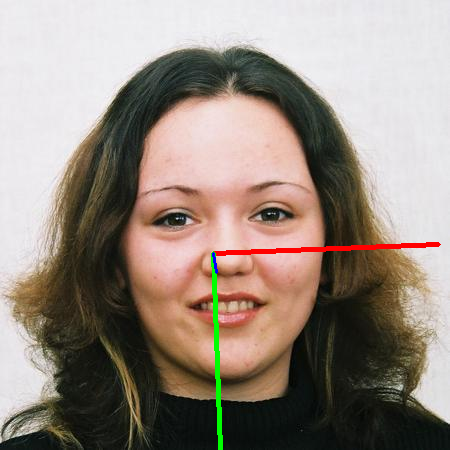

In [215]:


for idx, det in enumerate(dets):
            # Get x_min, y_min, x_max, y_max, conf
            x_min = det.rect.left()
            y_min = det.rect.top()
            x_max = det.rect.right()
            y_max = det.rect.bottom()
            conf = det.confidence

            if conf > 1.0:
                # bbox_width = abs(x_max - x_min)
                # bbox_height = abs(y_max - y_min)
                bbox_height, bbox_width = frame.shape[:2]
                # x_min -= 2 * bbox_width /2
                # x_max += 2 * bbox_width / 2
                # y_min -= 3 * bbox_height / 2
                # y_max += bbox_height /2
              
               
                # x_min = max(x_min, 0); y_min = max(y_min, 0)
                # x_max = min(frame.shape[1], x_max); y_max = min(frame.shape[0], y_max)

                cv2.destroyAllWindows()
                cv2_imshow(draw_axis(frame, -0.8,-5, -2, tdx = (x_min + x_max) / 2, tdy= (y_min + y_max) / 2, size = bbox_height/2)
                )
cv2.destroyAllWindows()
